# Instruction
Problem: *Lightweight model*

Using CNN (2-5 layers stack) then explore strategy to reduce model size and training time

# Steps
1. Find research gap
2. Experiment to prove / test, is proposed method solved the research gap?
3. test the proposed method to show it is really working
4. Compare with the SOTA from literatures
5. Analysis to show why the proposed method worked well both ANALYTIC and EMPIRIC
6. Finish the paper (min 15 pages, references min 15, DEADLINE 30 NOV 2024!!!

In [43]:
!python --version

Python 3.10.13


# Import & Install Required Packages

In [44]:
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

In [45]:
import os
import itertools

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow.keras as keras

In [47]:
import matplotlib.pyplot as plt

%pip install plotly
import plotly.graph_objs as go

Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip install scikit-learn

from scipy.io import loadmat
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import mnist
from keras.utils import to_categorical

from plotly import tools, subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Note: you may need to restart the kernel to use updated packages.


# Load dataset

In [49]:
mnist_data = mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = mnist_data

In [50]:
# count the number of unique train labels
unique, counts = np.unique(Y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
mnist_data = mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = mnist_data

# count the number of unique test labels
unique, counts = np.unique(Y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [51]:
# convert to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [52]:
len(Y_train)

60000

# Define the CNN model

In [53]:
model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(28, 28)),
        keras.layers.Reshape(target_shape=(28, 28, 1)),
        keras.layers.Conv2D(8, kernel_size=(4, 4), strides=(1, 1), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((8, 8), padding='same'),
        keras.layers.Conv2D(16, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((4, 4), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10)
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          528       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16)               

# Compile and training the model

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# training the model
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 24s 16ms/step - loss: 5.7726 - accuracy: 0.4764 - val_loss: 1.0065 - val_accuracy: 0.6887
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.7731 - accuracy: 0.7577 - val_loss: 0.5876 - val_accuracy: 0.8066
Epoch 3/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.4985 - accuracy: 0.8430 - val_loss: 0.4239 - val_accuracy: 0.8652
Epoch 4/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.3818 - accuracy: 0.8795 - val_loss: 0.3183 - val_accuracy: 0.9037
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.3146 - accuracy: 0.9013 - val_loss: 0.2554 - val_accuracy: 0.9196
Epoch 6/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2636 - accuracy: 0.9186 - val_loss: 0.2411 - val_accuracy: 0.9277
Epoch 7/10
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2319 - accuracy: 0.9280 - val_loss: 0.1856 -

# Result

# Visualization

In [55]:
def plot_images_sample(X, Y):
    plt.figure(figsize=(10,10))
    rand_indicies = np.random.randint(len(X), size=25)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays,
        # which is why you need the extra index
        plt.xlabel(Y[index])
    plt.show()


# plot_images_sample(mnist_data, mnist_label)

# Draw plot for CNN training

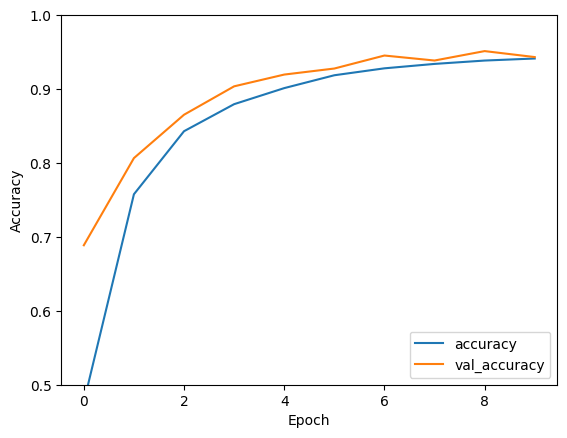

In [56]:
# Draw plot for CNN training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [57]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 4ms/step - loss: 0.1885 - accuracy: 0.9402
Test accuracy: 0.9401999711990356


# Prediction

313/313 [==============================] - 1s 4ms/step


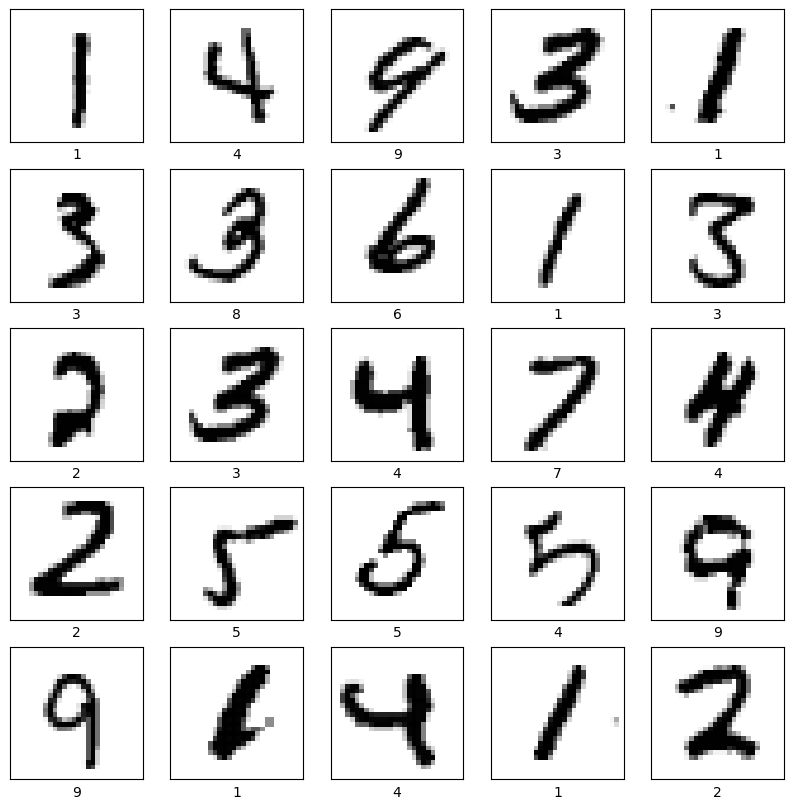

In [58]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

plot_images_sample(X_test, predictions)

# Wrong test

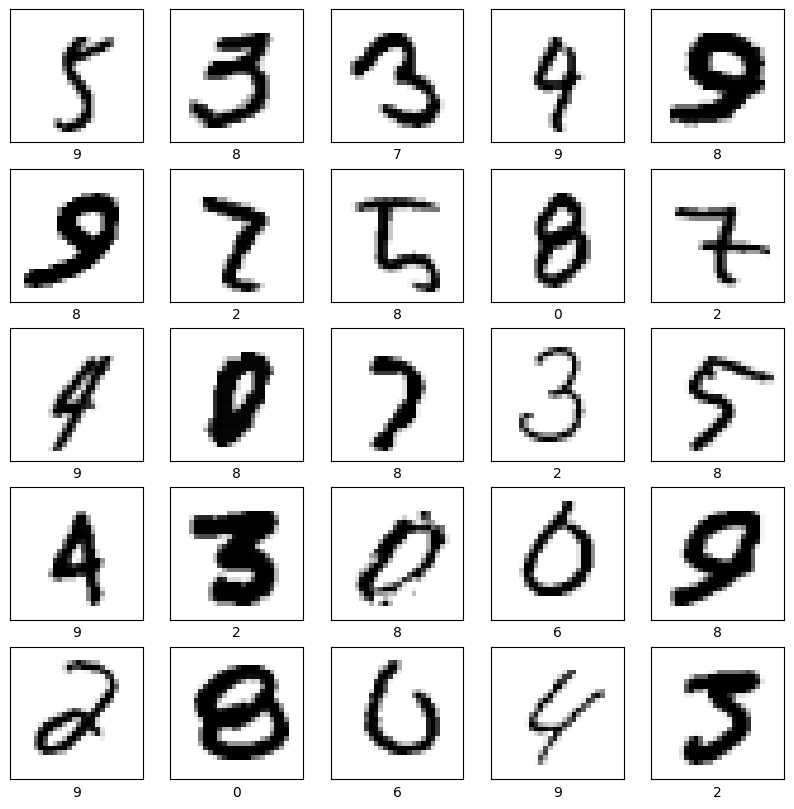

In [59]:
X_test_wrong = []
predictions_wrong = []
for i in range(len(X_test)):
    if predictions[i] != np.argmax(Y_test[i]):
        X_test_wrong.append(X_test[i])
        predictions_wrong.append(predictions[i])

plot_images_sample(X_test_wrong, predictions_wrong)

# Plotting the loss error (Plotly)

In [63]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [65]:
# Thanks to https://www.kaggle.com/vbmokin/tensorflow-keras-gpu-for-chinese-mnist-prediction
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    #define the traces
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
    fig = subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    #add traces to the figure
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    #set the layout for the figure
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])
    #plot
    iplot(fig, filename='accuracy-loss')

In [66]:
plot_accuracy_and_loss(history)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Confusion matrix

In [ ]:
def plot_cm(train, target_train):
# Look at confusion matrix
# Thanks to https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # Predict the values from the validation dataset
    Y_pred = model.predict(train)
    # Convert predictions classes to one hot vectors
    Y_pred_classes = np.argmax(Y_pred,axis = 1)
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(target_train,axis = 1)
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
    # plot the confusion matrix
    plot_confusion_matrix(confusion_mtx, classes = range(10))

In [ ]:
plot_cm(X_train, Y_train)

In [ ]:
# Draw confusing matrix for test data
plot_cm(X_test, Y_test)

# Save the model to a file

In [ ]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'cnn_model.keras'
model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")

# Define the model and apply the sparsity API

In [ ]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      # 'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.5, begin_step=0, frequency=100)
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
  }

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]

pruned_model = prune_low_magnitude(model, **pruning_params)

# Use smaller learning rate for fine-tuning
opt = keras.optimizers.Adam(learning_rate=1e-5)

pruned_model.compile(
  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy']
)

pruned_model.summary()

# Pruning Process

In [ ]:
pruned_model.fit(
  X_train,
  Y_train,
  epochs=10,
  validation_split=0.2,
  callbacks=callbacks)

In [ ]:
model_save_path = 'cnn_pruned_model.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'pruned_model.tflite'
with open('pruned_model.tflite', 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

# Post Training Quantization

In [ ]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Optionally, if you have representative data, you can enable full integer quantization:
# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open('quantized_pruned_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path='quantized_pruned_model.tflite')
interpreter.allocate_tensors()

In [ ]:
final_model.compile(
  loss=keras.losses.CategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
final_model.fit(
  X_train,
  Y_train,
  epochs=10,
  validation_split=0.2,
  callbacks=callbacks)

In [ ]:
model_size = os.path.getsize('quantized_pruned_model.tflite')
print(f"Model size after quantization: {model_size / 1024:.2f} KB")

# Optimized Model with Knowledge Distillation

In [ ]:
# Define student model (simpler architecture)
# def create_student_model():
#     model = models.Sequential([
#         layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#         layers.MaxPooling2D((2, 2)),
#         layers.Flatten(),
#         layers.Dense(10, activation='softmax')
#     ])
#     return model

# Custom loss function for Knowledge Distillation
def distillation_loss(y_true, y_pred, teacher_logits, temperature=5.0, alpha=0.5):
    student_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    distillation_loss = tf.keras.losses.KLDivergence()(
        tf.nn.softmax(teacher_logits / temperature),
        tf.nn.softmax(y_pred / temperature)
    )
    return alpha * student_loss + (1 - alpha) * distillation_loss

# Train student model using knowledge distillation
# student_model = create_student_model()
# student_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
student_model = model

# Train student model with teacher model's logits
def train_student_model(student_model, teacher_model, X_train, y_train):
    teacher_logits = teacher_model.predict(X_train)

    # Custom training loop
    for epoch in range(10):
        print(f"Epoch {epoch + 1}/10")
        for i in range(0, len(X_train), 32):
            X_batch = X_train[i:i+32]
            y_batch = y_train[i:i+32]
            with tf.GradientTape() as tape:
                y_pred = student_model(X_batch, training=True)
                loss = distillation_loss(y_batch, y_pred, teacher_logits[i:i+32])
            grads = tape.gradient(loss, student_model.trainable_variables)
            student_model.optimizer.apply_gradients(zip(grads, student_model.trainable_variables))

# Train the student model
train_student_model(student_model, final_model, X_train, Y_train)

In [ ]:
# Evaluate student model
student_loss, student_accuracy = student_model.evaluate(X_test, Y_test)
print(f"Student Model Accuracy: {student_accuracy}, Loss: {student_loss}")

In [ ]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'student_model_2.keras'
student_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")